# 50_Startups

**Linear Regression:**
XYZ is a venture capital firms in the US. They are planning to invest in some of the potential startups across the US. They have already invested in around fifty startups in Florida, Newyork and California. You are a data analyst at XYZ and you have been asked to build a model that predicts the profitability of the firm’s future investments. Below is the snapshot of the data you have.

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [ ]:
md = pd.read_csv("50_Startups.csv")

In [ ]:
md.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
md.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
dummy = pd.get_dummies(md.State, drop_first = True)
dummy.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [ ]:
md = pd.concat([md, dummy], axis = 1)
md.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [ ]:
md = md.drop(["State"], axis = 1)
md.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


## Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
# np.random.seed(0)
md_train, md_test = train_test_split(md, train_size = 0.7, test_size = 0.3, 
                                     random_state = 100)
print(md_train.shape)
print(md_test.shape)

(35, 6)
(15, 6)


## Looking for Correlations

In [ ]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

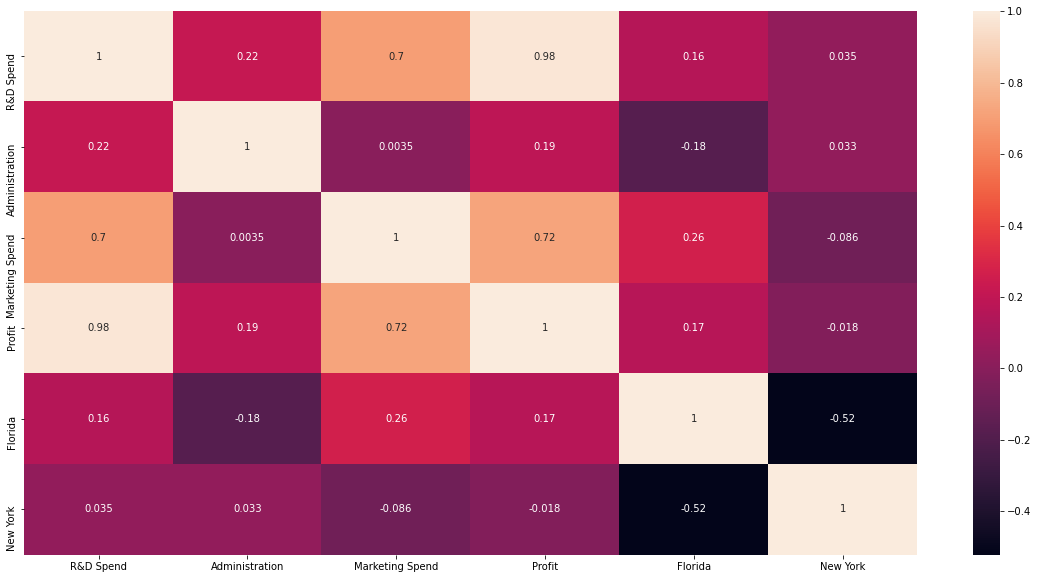

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(md_train.corr(),annot = True)
plt.show()

In [ ]:
md["Profit"].skew()

0.023291019769116614

In [ ]:
md_train.describe()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,78025.959429,124822.508571,217107.068571,115012.672286,0.342857,0.342857
std,43137.808375,25945.934687,121471.889314,38476.690544,0.481594,0.481594
min,0.000000,51743.150000,0.000000,35673.410000,0.000000,0.000000
25%,53781.225000,109636.640000,136006.345000,97070.320000,0.000000,0.000000
50%,75328.870000,127320.380000,249839.440000,108733.990000,0.000000,0.000000
75%,108218.345000,147124.505000,304043.995000,137946.435000,1.000000,1.000000
max,162597.700000,157693.920000,443898.530000,191792.060000,1.000000,1.000000


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

md_train[['R&D Spend','Administration','Marketing Spend', 'Profit']] = scaler.fit_transform(md_train[['R&D Spend','Administration','Marketing Spend', 'Profit']])

md_train.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
25,-0.314256,0.576033,-0.661057,-0.200626,0,0
26,-0.063435,0.755241,-0.693737,-0.244683,1,0
35,-0.752919,-1.555379,-0.096801,-0.488705,0,1
17,0.391165,0.792062,0.546818,0.273124,0,1
7,1.229439,0.809756,0.891798,1.074279,1,0


## Dividing into X and Y sets for the model building

In [ ]:
y_train = md_train.pop('Profit')
X_train = md_train

In [ ]:
y_train.head()

25   -0.200626
26   -0.244683
35   -0.488705
17    0.273124
7     1.074279
Name: Profit, dtype: float64

In [ ]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
25,-0.314256,0.576033,-0.661057,0,0
26,-0.063435,0.755241,-0.693737,1,0
35,-0.752919,-1.555379,-0.096801,0,1
17,0.391165,0.792062,0.546818,0,1
7,1.229439,0.809756,0.891798,1,0


## Building a linear model

Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [ ]:
import statsmodels.api as sm

In [ ]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train)
X_train_lm1.head()

,const,R&D Spend,Administration,Marketing Spend,Florida,New York
25,1.0,-0.314256,0.576033,-0.661057,0,0
26,1.0,-0.063435,0.755241,-0.693737,1,0
35,1.0,-0.752919,-1.555379,-0.096801,0,1
17,1.0,0.391165,0.792062,0.546818,0,1
7,1.0,1.229439,0.809756,0.891798,1,0


In [ ]:
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm1).fit()

In [ ]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     167.1
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.87e-20
Time:                        19:17:53   Log-Likelihood:                 9.7478
No. Observations:                  35   AIC:                            -7.496
Df Residuals:                      29   BIC:                             1.837
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0775      0.062     

## Checking VIF

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,R&D Spend,2.16
2,Marketing Spend,2.11
1,Administration,1.12
3,Florida,1.07
4,New York,1.02


##  Dropping the variable and updating the model

In [ ]:
# Dropping highly correlated variables and insignificant variables
X1 = X_train.drop('Administration', axis = 1)

In [ ]:
X1.head()

,R&D Spend,Marketing Spend,Florida,New York
25,-0.314256,-0.661057,0,0
26,-0.063435,-0.693737,1,0
35,-0.752919,-0.096801,0,1
17,0.391165,0.546818,0,1
7,1.229439,0.891798,1,0


In [ ]:
# Build a second model

X_train_lm2= sm.add_constant(X1)

# X_train_lm2.head()
lr_2 = sm.OLS(y_train, X_train_lm2).fit()

In [ ]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     214.1
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.36e-21
Time:                        19:19:45   Log-Likelihood:                 9.5881
No. Observations:                  35   AIC:                            -9.176
Df Residuals:                      30   BIC:                            -1.400
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0722      0.061     

In [ ]:
# Dropping highly correlated variables and insignificant variables
X2 = X1.drop('Florida', axis = 1)
X2.head()

,R&D Spend,Marketing Spend,New York
25,-0.314256,-0.661057,0
26,-0.063435,-0.693737,0
35,-0.752919,-0.096801,1
17,0.391165,0.546818,1
7,1.229439,0.891798,0


In [ ]:
# Build a second model

X_train_lm3= sm.add_constant(X2)

lr_3 = sm.OLS(y_train, X_train_lm3).fit()

In [ ]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     287.1
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.08e-22
Time:                        19:20:32   Log-Likelihood:                 9.1327
No. Observations:                  35   AIC:                            -10.27
Df Residuals:                      31   BIC:                            -4.044
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0327      0.041     

In [ ]:
# Dropping highly correlated variables and insignificant variables
X3 = X2.drop('New York', axis = 1)
X3.head()

,R&D Spend,Marketing Spend
25,-0.314256,-0.661057
26,-0.063435,-0.693737
35,-0.752919,-0.096801
17,0.391165,0.546818
7,1.229439,0.891798


In [ ]:
# Build a second model

X_train_lm4= sm.add_constant(X3)

lr_4 = sm.OLS(y_train, X_train_lm4).fit()

In [ ]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     419.5
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.10e-23
Time:                        19:21:02   Log-Likelihood:                 8.1556
No. Observations:                  35   AIC:                            -10.31
Df Residuals:                      32   BIC:                            -5.645
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.776e-16      0.034   8.

In [ ]:
# Dropping highly correlated variables and insignificant variables
X4 = X3.drop('Marketing Spend', axis = 1)
X4.head()

,R&D Spend
25,-0.314256
26,-0.063435
35,-0.752919
17,0.391165
7,1.229439


In [ ]:
# Build a second model

X_train_lm5= sm.add_constant(X4)

lr_5 = sm.OLS(y_train, X_train_lm5).fit() 

In [ ]:
# Print the summary of the model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     792.2
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.20e-24
Time:                        19:21:57   Log-Likelihood:                 6.6723
No. Observations:                  35   AIC:                            -9.345
Df Residuals:                      33   BIC:                            -6.234
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-16      0.035   7.97e-15      1.0

In [ ]:
pred_train =  lr_3.predict(X_train_lm3)

Text(0.5, 0, 'Errors')

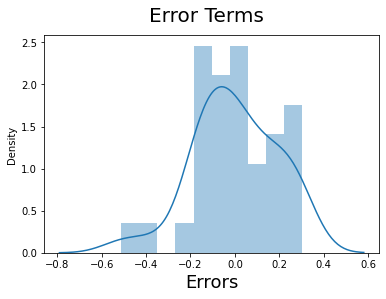

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - pred_train), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
# plt.savefig("Error")

In [ ]:
# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X2, y_train], axis=1)
# model values
model_fitted_y = lr_3.fittedvalues
# model residuals
model_residuals = lr_3.resid
# normalized residuals
model_norm_residuals = lr_3.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = lr_3.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = lr_3.get_influence().cooks_distance[0]

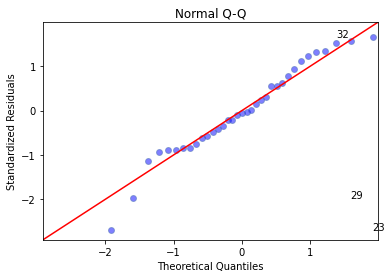

In [ ]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

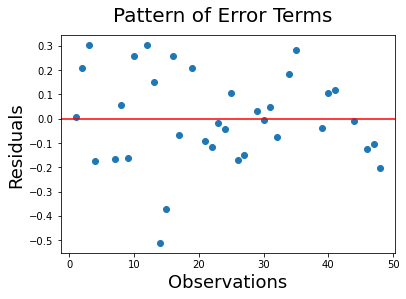

In [ ]:
plt.scatter(md_train.index, (y_train - pred_train))
plt.suptitle('Pattern of Error Terms', fontsize = 20)  
plt.xlabel('Observations', fontsize = 18) 
plt.ylabel("Residuals", fontsize = 18)
plt.axhline(y=0.0, color='r', linestyle='-')
# plt.savefig("Pattern of Error Term")

In [ ]:
dataframe.head()

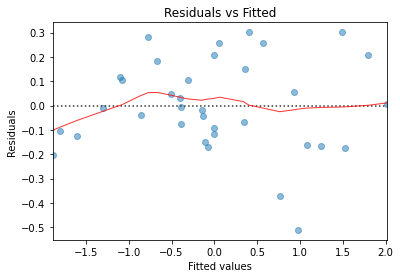

In [ ]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [ ]:
# create dataframe from X, y for easier plot handling
dataframe1 = pd.concat([X3, y_train], axis=1)
# model values
model_fitted_y = lr_4.fittedvalues
# model residuals
model_residuals = lr_4.resid
# normalized residuals
model_norm_residuals = lr_4.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = lr_4.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = lr_4.get_influence().cooks_distance[0]

In [ ]:
pred_train2 = lr_4.predict(X_train_lm4)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - pred_train2), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
# plt.savefig("Error")

In [ ]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_3 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_3.axes[0].set_title('Normal Q-Q')
plot_lm_3.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_3.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [ ]:
plt.scatter(md_train.index, (y_train - pred_train2))
plt.suptitle('Pattern of Error Terms', fontsize = 20)  
plt.xlabel('Observations', fontsize = 18) 
plt.ylabel("Residuals", fontsize = 18)
plt.axhline(y=0.0, color='r', linestyle='-')
# plt.savefig("Pattern of Error Term")

In [ ]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe1.columns[-1], data=dataframe1,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [ ]:
mar_sp_sq_neg = -(md_train["Marketing Spend"]**2)
mar_sp_sq_neg.head()

In [ ]:
X2_sq = X2.drop('Marketing Spend', axis = 1)
X2_sq.head()

In [ ]:
X2_sq = pd.concat([X2_sq, mar_sp_sq_neg], axis = 1)

In [ ]:
X2_sq.head()

In [ ]:
X_train_lm_sq= sm.add_constant(X2_sq)

lr_sq = sm.OLS(y_train, X_train_lm_sq).fit()

In [ ]:
print(lr_sq.summary())

In [ ]:
# create dataframe from X, y for easier plot handling
dataframe2 = pd.concat([X2_sq, y_train], axis=1)
# model values
model_fitted_y = lr_sq.fittedvalues
# model residuals
model_residuals = lr_sq.resid
# normalized residuals
model_norm_residuals = lr_sq.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = lr_sq.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = lr_sq.get_influence().cooks_distance[0]

In [ ]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe2.columns[-1], data=dataframe2,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');